In [1]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [2]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Specific Plotting Params
i_leu = 0
i_delta = 2
i_heu = 4

ps = 0

In [3]:
UM_dir = 'data/UM_data/initial_tests_v1.2/'
LEU_file = UM_dir + 'run-1-fac-16.dat'
delta_LEU_file = UM_dir + 'run-1-fac-17.dat'

ylab = "Throughput (kg)"
plot_dir = UM_dir + 'png/'
ps =1

In [4]:
from manip_data import trunc_flt
from manip_data import import_data_cyan

time, LEU_tp = import_data_cyan(LEU_file)
time_delta, delta_tp = import_data_cyan(delta_LEU_file)

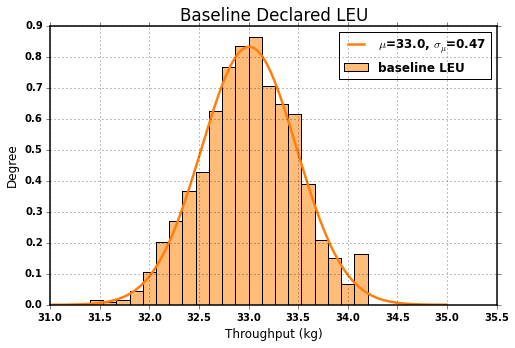

In [5]:
precision=2

bins=30
xmin=31
xmax=35

pre_hist = LEU_tp[:999].plot(kind='hist', bins=bins,color=tableau20[i_delta+1],
                            alpha=1.0,range=(xmin,xmax),normed=1,label='baseline LEU')

pre_mean = np.mean(LEU_tp[:999])
pre_variance = np.var(LEU_tp[:999])
pre_sigma = np.sqrt(pre_variance)
x = np.linspace(xmin,xmax,100)

plt.plot(x,mlab.normpdf(x,pre_mean,pre_sigma),color=tableau20[i_delta], 
         label='$\mu$=' + trunc_flt(pre_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(pre_sigma, precision))

legend()
plt.xlabel(ylab)

plt.title("Baseline Declared LEU")

if ps == 1:
    savefig(plot_dir + 'baseline_LEU.png')
else:
    plt.title("Baseline Declared LEU")

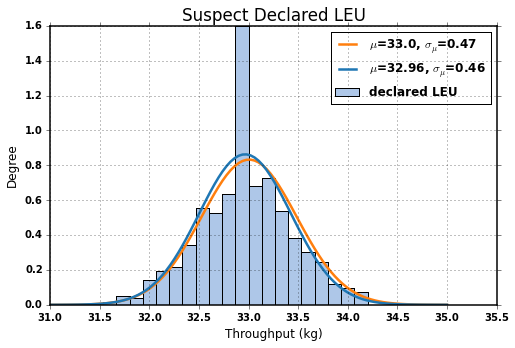

In [6]:

post_hist = LEU_tp[1000:].plot(kind='hist', bins=bins,color=tableau20[i_leu+1],
              alpha=1.0,range=(xmin,xmax),normed=1,label='declared LEU')

post_mean = np.mean(LEU_tp[1000:])
post_variance = np.var(LEU_tp[1000:])
post_sigma = np.sqrt(post_variance)
x = np.linspace(xmin,xmax,100)

plt.plot(x,mlab.normpdf(x,pre_mean,pre_sigma),color=tableau20[i_delta], 
         label='$\mu$=' + trunc_flt(pre_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(pre_sigma, precision))

plt.plot(x,mlab.normpdf(x,post_mean,post_sigma),color=tableau20[i_leu], 
        label='$\mu$=' + trunc_flt(post_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(post_sigma, precision))

plt.xlabel(ylab)


legend()
plt.xlabel(ylab)
plt.title("Suspect Declared LEU")
if ps == 1:
    savefig(plot_dir + 'suspect_LEU.png')
else:
    plt.title("Suspect Declared LEU")

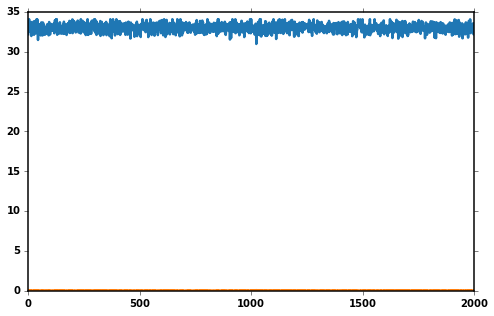

In [7]:
plt.plot(time,LEU_tp, label='Declared LEU', color=tableau20[i_leu])
plt.plot(time_delta,delta_tp, label='Natural LEU ', color=tableau20[i_delta]) 
